## Optimization exercise

**Goal: Train the 2nd order polynomial predictor using gradient descent. Optimize the stepsizes and compare against scikit-learn's implementation.**

In [1]:
import pandas as pd
import numpy as np
# from datetime import datetime


In [75]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [676]:
import matplotlib.pyplot as plt

#### Task I
Download the data from [here](https://drive.google.com/file/d/0Bz9_0VdXvv9bUUNlUTVrMF9VcVU/view?usp=sharing&resourcekey=0-16O9Fc5eaJH99-M7AHqHOg).

In [713]:
data_path = ''
nb = pd.read_csv(data_path+'nba_games_2013_2015.csv', delimiter=';')
x = nb.loc[:,['AST','REB','STL']]
y = nb.loc[:,'PTS']
x.head()

,AST,REB,STL
0,41,43,14
1,23,43,8
2,20,39,7
3,19,47,6
4,21,43,4



#### TASK II
Create a function `psi(x)`, which transforms features AST (assists), REB (rebounds) and STL (steals) into 2nd order polynomial features (add each feature squared and each pair of features multiplied with every other)

**Input:** DataFrame x from above. It contains columns AST, REB, STL

**Output:** DataFrame with columns: AST, REB, STL, 1, AST^2, REB^2, STL^2, ASTSTL, REBSTL, ASTREB. The number of rows should be the same as Input.

In [650]:
def psi(x):
    deg = 2
    poly_feats = PolynomialFeatures(degree=deg)
    # this takes the features and creates the polynomial but without the weights, e.g.
    # x1^2, x1*x2, x^2
    X_deg = poly_feats.fit_transform(x)
    X_poly_feat_names = poly_feats.get_feature_names_out(x.columns.to_list()) 

    df_poly = pd.DataFrame(X_deg, columns=X_poly_feat_names)
    # print(df_poly.columns)
    # reorder the columns to be compatible with exercise requirement
    columns1 = df_poly.filter(items=x.columns.to_list())
    columns2 = df_poly['1']
    columns3 = df_poly.filter(regex='\^2')
    columns4 = df_poly.filter(items=list(set(df_poly.columns.to_list()) - set(columns1.columns.to_list()) - set(columns2.name) - set(columns3.columns)))

    X = pd.concat([columns1,columns2,columns3,columns4],axis=1)
    return X
    

In [651]:
# # 2022-10-16 20:21
# def psi(x):
#     deg = 2
#     poly_feats = PolynomialFeatures(degree=deg)
#     # this takes the features and creates the polynomial but without the weights, e.g.
#     # x1^2, x1*x2, x^2
#     X_deg = poly_feats.fit_transform(x)
#     X_poly_feat_names = poly_feats.get_feature_names_out(x.columns.to_list()) 

#     df_poly = pd.DataFrame(X_deg, columns=X_poly_feat_names)
#     return df_poly

In [652]:
# Experiment with reordering columns to put into the function
X = psi(x)
# columns = x.columns.to_list()
columns1 = X.filter(items=x.columns.to_list())
columns2 = X['1']
columns3 = X.filter(regex='\^2')
columns4 = X.filter(items=list(set(X.columns.to_list()) - set(columns1.columns.to_list()) - set(columns2.name) - set(columns3.columns)))

X = pd.concat([columns1,columns2,columns3,columns4],axis=1)
X

,AST,REB,STL,1,AST^2,REB^2,STL^2,AST STL,AST REB,REB STL
0,41.0,43.0,14.0,1.0,1681.0,1849.0,196.0,574.0,1763.0,602.0
1,23.0,43.0,8.0,1.0,529.0,1849.0,64.0,184.0,989.0,344.0
2,20.0,39.0,7.0,1.0,400.0,1521.0,49.0,140.0,780.0,273.0
3,19.0,47.0,6.0,1.0,361.0,2209.0,36.0,114.0,893.0,282.0
4,21.0,43.0,4.0,1.0,441.0,1849.0,16.0,84.0,903.0,172.0
...,...,...,...,...,...,...,...,...,...,...
7375,17.0,39.0,10.0,1.0,289.0,1521.0,100.0,170.0,663.0,390.0
7376,26.0,40.0,10.0,1.0,676.0,1600.0,100.0,260.0,1040.0,400.0
7377,23.0,52.0,8.0,1.0,529.0,2704.0,64.0,184.0,1196.0,416.0
7378,23.0,41.0,11.0,1.0,529.0,1681.0,121.0,253.0,943.0,451.0


#### Task III
Create a transformed data matrix **X**, where each **x** is mapped to psi(x).

HINT: We need to apply our function from Task II to matrix (DataFrame) x

In [653]:
X = psi(x)
X

,AST,REB,STL,1,AST^2,REB^2,STL^2,AST STL,AST REB,REB STL
0,41.0,43.0,14.0,1.0,1681.0,1849.0,196.0,574.0,1763.0,602.0
1,23.0,43.0,8.0,1.0,529.0,1849.0,64.0,184.0,989.0,344.0
2,20.0,39.0,7.0,1.0,400.0,1521.0,49.0,140.0,780.0,273.0
3,19.0,47.0,6.0,1.0,361.0,2209.0,36.0,114.0,893.0,282.0
4,21.0,43.0,4.0,1.0,441.0,1849.0,16.0,84.0,903.0,172.0
...,...,...,...,...,...,...,...,...,...,...
7375,17.0,39.0,10.0,1.0,289.0,1521.0,100.0,170.0,663.0,390.0
7376,26.0,40.0,10.0,1.0,676.0,1600.0,100.0,260.0,1040.0,400.0
7377,23.0,52.0,8.0,1.0,529.0,2704.0,64.0,184.0,1196.0,416.0
7378,23.0,41.0,11.0,1.0,529.0,1681.0,121.0,253.0,943.0,451.0


#### Task IV
Create a function `p2(x,w)`, which outputs the value of the polynomial ata given row of `x` for given parameters `w`.

Inputs:
- x: DataFrame from above
- w: vector which represents beta coeficients for each column of X from the Task III.

Ouputs:
- Series of the same length as DataFrame x. Each value is a dot product of particular row in DataFrame and coeficients `w`.


HINT:
- length of w needs to be the same as number of columns of the dataframe that is returned from function `psi(x)`

Example Input:

`p2(x, [0.06, 0.05,0.03,0.01,0.02,0.02,0.04, 0.03,0.02,0.01])`

Example Output:

```
0       130.37
1        76.19
2        61.21
3        74.51
4        64.97
         ...  
7375     63.01
7376     79.59
7377     97.25
7378     78.85
7379     61.53
Length: 7380, dtype: float64

```

Our columns in the DataFrame **X** that is the output of `psi(x)` were in this order: `AST, REB, STL, 1, AST^2, REB^2, STL^2, ASTSTL, REBSTL, ASTREB`. If your columns are in different order the result can be different even for the **w**.

In [654]:
w = [0.06, 0.05,0.03,0.01,0.02,0.02,0.04, 0.03,0.02,0.01]
def p2(x,w):
    return np.dot(x,w)
    
y_pred = p2(X, w)
y_pred.shape

(7380,)

<AxesSubplot: >

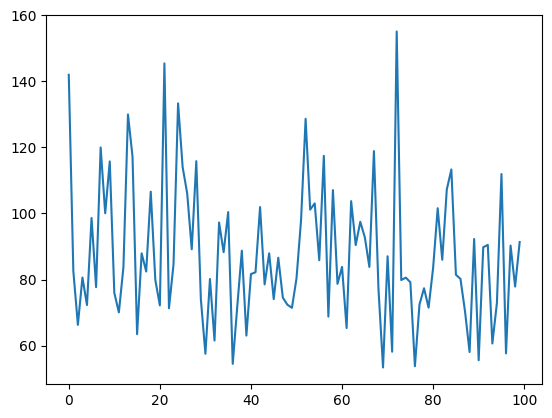

In [655]:
sns.lineplot(y_pred[0:100])

#### Task V
Create a function `Loss(x,y,w)`, which computes the squared loss of predicting **y** from **x** by `p2(x,w)` using parameters **w**. We have specified **y** as the variable PTS above. We will predict scored points (PTS) based on assists, rebounds and steals.


HINTS: 
- Output of `p2(x,w)` represents our predictions. `y_pred = p2(x,w)`
- Loss can be computed as:

```
np.mean((y_pred - y)**2)
```

In [656]:
def Loss (x,y,w):
    return np.mean((p2(x,w)-y)**2)

Loss(X,y,w)

653.1807227777778

In [657]:
w

[0.06, 0.05, 0.03, 0.01, 0.02, 0.02, 0.04, 0.03, 0.02, 0.01]

#### Task VI
Code up the gradient descent. It should input **x**, target variable **y**, stepsize **alpha**, coeficients **w** and **maximum number of iterations**.

Steps:
1. transform input `x`
2. compute initial loss for given, x,y and w and append it to the empty list.
3. Inside the for loop, update each element of **w**, **w[i]**, using gradient descent.

HINT: `w[i] = w[i] - alpha * (1.0 / m) * errors_i.sum()` where `errors_i = (y_pred - y) * X.iloc[:, i]`. We are scaling the errors by multiplicating with values that are relevant for coeficients `w[i]` (column `i` of DataFrame `X`, output of `psi(x)`).

4. compute new loss using updated `w` and append to the list that we created in the step 2.
5. repeat steps 3 and 4 for max number of iterations times.

In [737]:

def gradient_descent(x,y,alpha,w,max_iter):
    X = psi(x)
    # print(x.shape)
    # print(X.shape)
    # print(y.shape)
    w_history = []
    loss_history =[]
    
    loss_history = []
    for i in range(max_iter): # i refers to the iteration 
        y_pred = p2(X,w)
        error = y - p2(X,w)
        error = error.reshape(-1,1)
        # print(psi(x).shape)
        loss = Loss(X,y,w)
        gradient = -(1.0 / y.size) * (error*psi(x)).sum() # this works, but makes Loss increase
        # gradient = -np.dot(X.transpose(),error).sum()/len(y) # See 'W04D4 - Optimization' lecture slides 21 and 24

        # print(gradient.shape)
        # print(gradient)
        w = w - (alpha * gradient)

        w_history.append(w)
        loss_history.append(loss)
    w_df = pd.DataFrame(w_history,columns=X.columns)
    w_df['loss'] = loss_history
                
    return w_df


alpha = .00000001
max_iter=5
gradient_descent(x,y.values,alpha,w,max_iter)
       

,AST,REB,STL,1,AST^2,REB^2,STL^2,AST STL,AST REB,REB STL,loss
0,0.060004,0.050007,0.030001,0.010000,0.020084,0.020277,0.040011,0.030028,0.020147,0.010051,653.180723
1,0.060008,0.050014,0.030003,0.010000,0.020164,0.020539,0.040022,0.030055,0.020287,0.010099,631.964158
2,0.060011,0.050020,0.030004,0.010001,0.020240,0.020786,0.040032,0.030080,0.020420,0.010145,612.946602
3,0.060014,0.050027,0.030005,0.010001,0.020313,0.021020,0.040042,0.030104,0.020546,0.010189,595.899609
4,0.060018,0.050033,0.030006,0.010001,0.020382,0.021241,0.040051,0.030127,0.020665,0.010230,580.618466


#### Task VII
Choose an arbitrary **w** and **alpha** and run gradient descent for 100 iterations. How does the loss behave? Does it converge to something?


<AxesSubplot: ylabel='loss'>

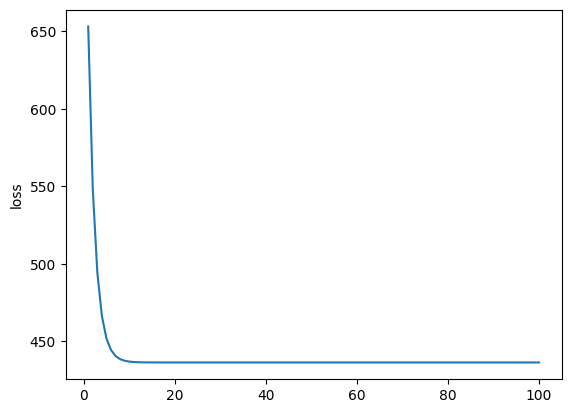

In [668]:
max_iter = 100
w = [0.06, 0.05,0.03,0.01,0.02,0.02,0.04, 0.03,0.02,0.01]
alpha = .0000001

w_history = gradient_descent(x,y.values,alpha,w,max_iter)
iterations = [i+1 for i in range(len(w_history))]

# sns.lineplot(x=iterations,y=loss)
sns.lineplot(x=iterations,y=w_history['loss'])

#### Task VIII
Can you find which **alpha** from `[1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]` has the smallest loss after 100 iterations for a given **w**?

C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\silvh\AppData\Local\Temp\ipykernel_27352\2321442751.py:2: RuntimeWarning: overflow encountered in square
  return np.mean((p2(x,w)-y)**2)


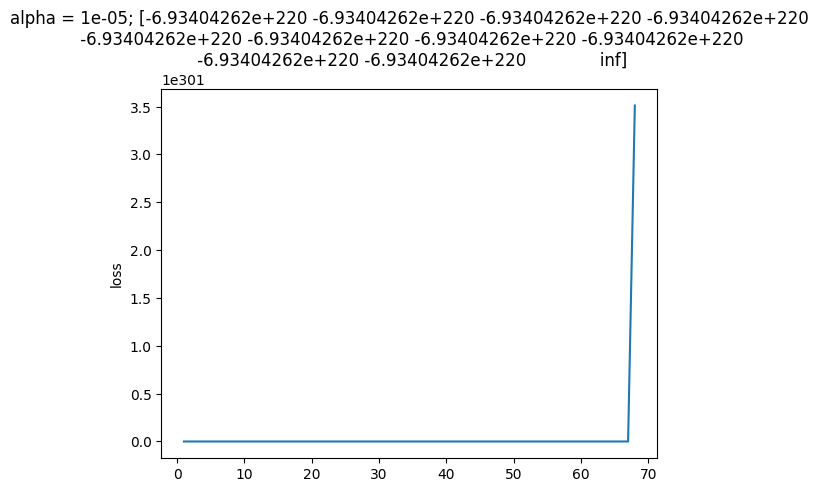

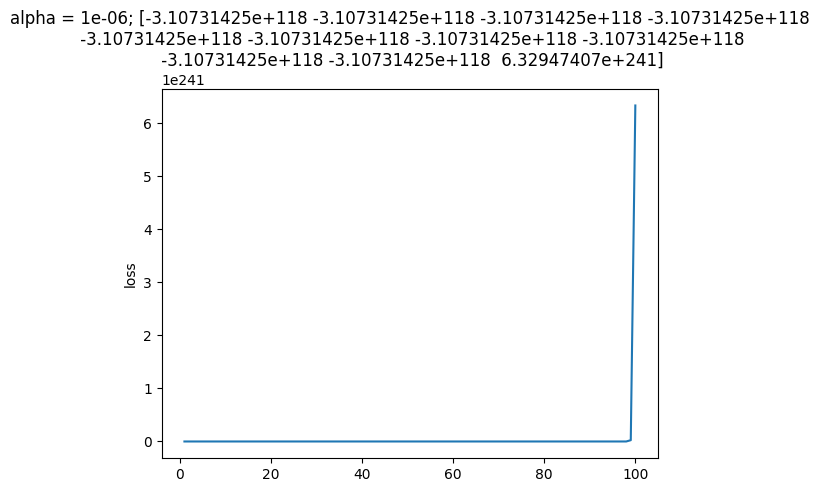

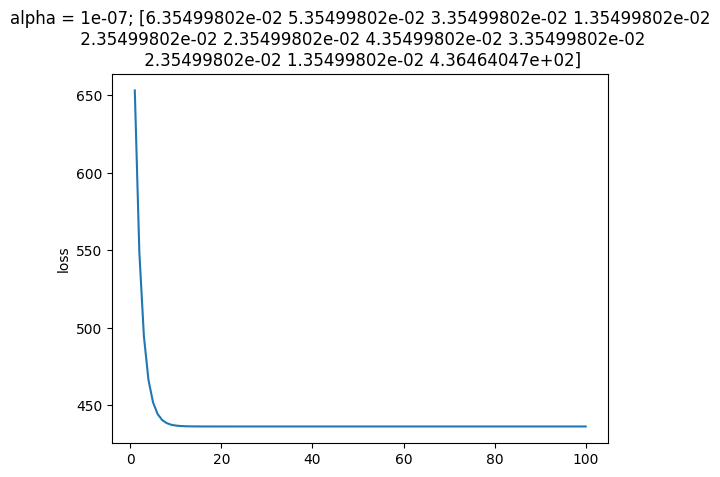

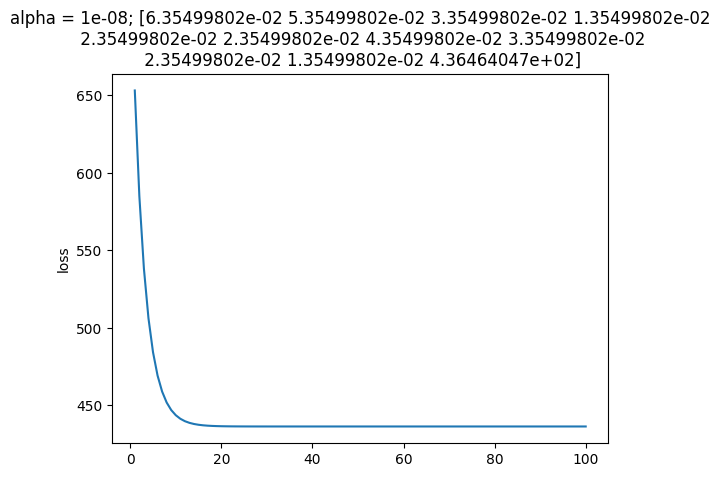

In [730]:
max_iter = 100
w = [0.06, 0.05,0.03,0.01,0.02,0.02,0.04, 0.03,0.02,0.01]
# alpha_list = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
alpha_list = [0.00001, 0.000001, 0.0000001, 0.00000001]
def plot_loss(x,y,alpha_list,w,max_iter):
    iterations = [i+1 for i in range(max_iter)]
    for alpha in alpha_list:
        w_history = gradient_descent(x,y.values,alpha,w,max_iter)
        fig,ax = plt.subplots()
        sns.lineplot(x=iterations,y=w_history['loss'])
        ax.set_title('alpha = '+str(alpha)+'; '+str(w_history.iloc[-1,:].values))

plot_loss(x,y,alpha_list,w,max_iter)

## Extra exercise from Silvia: using SciKitLearn to find the weights and intercepts.

In [716]:
x_values = x.values
y_values = y

# PolynomialFeatures will create a new matrix consisting of all polynomial combinations 
# of the features with a degree less than or equal to the degree we just gave the model (2)
poly_model = PolynomialFeatures(degree=degree)

# transform out polynomial features
poly_x_values = poly_model.fit_transform(x_values)

# should be in the form [1, a, b, a^2, ab, b^2]
print(f'initial values {x_values[0]}\nMapped to {poly_x_values[0]}')

initial values [41 43 14]
Mapped to [1.000e+00 4.100e+01 4.300e+01 1.400e+01 1.681e+03 1.763e+03 5.740e+02
 1.849e+03 6.020e+02 1.960e+02]


In [717]:
y_values.shape

(7380,)

In [720]:

poly_model.fit(poly_x_values, y_values)

regression_model = LinearRegression()

regression_model.fit(poly_x_values, y_values)

y_pred = regression_model.predict(poly_x_values)

regression_model.coef_



array([ 0.        ,  0.5768933 , -0.65678747,  0.01183014,  0.01216692,
        0.00343315,  0.00216776,  0.00821028,  0.00942449, -0.00684932])

In [738]:
# See how this compares to manual calculations from above
max_iter = 100
w = [0.06, 0.05,0.03,0.01,0.02,0.02,0.04, 0.03,0.02,0.01]
alpha=0.0000001
w_history = gradient_descent(x,y.values,alpha,w,max_iter)
w_history.tail()

,AST,REB,STL,1,AST^2,REB^2,STL^2,AST STL,AST REB,REB STL,loss
95,0.060672,0.051010,0.030256,0.010046,0.027608,0.020933,0.041404,0.032835,0.026936,0.013288,428.913644
96,0.060677,0.051020,0.030258,0.010047,0.027644,0.020907,0.041413,0.032851,0.026958,0.013307,428.847687
97,0.060683,0.051029,0.030261,0.010047,0.027679,0.020882,0.041423,0.032866,0.026980,0.013326,428.783049
98,0.060689,0.051038,0.030263,0.010047,0.027714,0.020857,0.041433,0.032882,0.027002,0.013345,428.719702
99,0.060694,0.051048,0.030265,0.010048,0.027748,0.020833,0.041442,0.032897,0.027024,0.013364,428.657616


In [739]:
# Original column order in PolynomialFeatures
def psi2(x):
    deg = 2
    poly_feats = PolynomialFeatures(degree=deg)
    # this takes the features and creates the polynomial but without the weights, e.g.
    # x1^2, x1*x2, x^2
    X_deg = poly_feats.fit_transform(x)
    X_poly_feat_names = poly_feats.get_feature_names_out(x.columns.to_list()) 

    df_poly = pd.DataFrame(X_deg, columns=X_poly_feat_names)

    return df_poly

psi2(x)

,1,AST,REB,STL,AST^2,AST REB,AST STL,REB^2,REB STL,STL^2
0,1.0,41.0,43.0,14.0,1681.0,1763.0,574.0,1849.0,602.0,196.0
1,1.0,23.0,43.0,8.0,529.0,989.0,184.0,1849.0,344.0,64.0
2,1.0,20.0,39.0,7.0,400.0,780.0,140.0,1521.0,273.0,49.0
3,1.0,19.0,47.0,6.0,361.0,893.0,114.0,2209.0,282.0,36.0
4,1.0,21.0,43.0,4.0,441.0,903.0,84.0,1849.0,172.0,16.0
...,...,...,...,...,...,...,...,...,...,...
7375,1.0,17.0,39.0,10.0,289.0,663.0,170.0,1521.0,390.0,100.0
7376,1.0,26.0,40.0,10.0,676.0,1040.0,260.0,1600.0,400.0,100.0
7377,1.0,23.0,52.0,8.0,529.0,1196.0,184.0,2704.0,416.0,64.0
7378,1.0,23.0,41.0,11.0,529.0,943.0,253.0,1681.0,451.0,121.0


## Ignore

In [703]:
deg = 2
poly_feats = PolynomialFeatures(degree=2)
X_deg = poly_feats.fit_transform(x.values) # Create the polynomial expression
X_deg.shape

(7380, 10)

In [708]:
poly_feats.fit(x,y)

PolynomialFeatures()

In [721]:
lr_poly = LinearRegression() # initiate a linear regression object
lr_poly.fit(X_deg, y)
y_prediction = lr_poly.predict(X_deg)
# print('y-int: ',lr_poly.intercept_)
print('regression ceofficients: ',lr_poly.coef_)


regression ceofficients:  [ 0.          0.5768933  -0.65678747  0.01183014  0.01216692  0.00343315
  0.00216776  0.00821028  0.00942449 -0.00684932]
